### Goal ###
Curate 1.88 million wild fire dataset from [USDA Research Data Archive](https://www.fs.usda.gov/rds/archive/catalog/RDS-2013-0009.4). Discard fires which occured outside of California.

In [1]:
import sys
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
con = sqlite3.connect('../data/USDA_wildfire_data/FPA_FOD_20170508.sqlite')
fires = pd.read_sql_query("SELECT * from fires", con)

LOTS of data in here, lets take a look at the column headers.

In [3]:
list(fires.columns.values)

['OBJECTID',
 'FOD_ID',
 'FPA_ID',
 'SOURCE_SYSTEM_TYPE',
 'SOURCE_SYSTEM',
 'NWCG_REPORTING_AGENCY',
 'NWCG_REPORTING_UNIT_ID',
 'NWCG_REPORTING_UNIT_NAME',
 'SOURCE_REPORTING_UNIT',
 'SOURCE_REPORTING_UNIT_NAME',
 'LOCAL_FIRE_REPORT_ID',
 'LOCAL_INCIDENT_ID',
 'FIRE_CODE',
 'FIRE_NAME',
 'ICS_209_INCIDENT_NUMBER',
 'ICS_209_NAME',
 'MTBS_ID',
 'MTBS_FIRE_NAME',
 'COMPLEX_NAME',
 'FIRE_YEAR',
 'DISCOVERY_DATE',
 'DISCOVERY_DOY',
 'DISCOVERY_TIME',
 'STAT_CAUSE_CODE',
 'STAT_CAUSE_DESCR',
 'CONT_DATE',
 'CONT_DOY',
 'CONT_TIME',
 'FIRE_SIZE',
 'FIRE_SIZE_CLASS',
 'LATITUDE',
 'LONGITUDE',
 'OWNER_CODE',
 'OWNER_DESCR',
 'STATE',
 'COUNTY',
 'FIPS_CODE',
 'FIPS_NAME',
 'Shape']

In [4]:
fires.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


Not sure about the format of the shape column, that one might be important later on. Lets push ahead with the minimum. First get only fires in California.

In [5]:
fires['Shape'][0]

b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0\xe0\xc8l\x98\xba\x04D@\xe8d\xc2\x92_@^\xc0\xe0\xc8l\x98\xba\x04D@|\x01\x00\x00\x00\xe8d\xc2\x92_@^\xc0\xe0\xc8l\x98\xba\x04D@\xfe'

In [6]:
list(fires['Shape'][0])
#output_numbers = list(input_bytes)

[0,
 1,
 173,
 16,
 0,
 0,
 232,
 100,
 194,
 146,
 95,
 64,
 94,
 192,
 224,
 200,
 108,
 152,
 186,
 4,
 68,
 64,
 232,
 100,
 194,
 146,
 95,
 64,
 94,
 192,
 224,
 200,
 108,
 152,
 186,
 4,
 68,
 64,
 124,
 1,
 0,
 0,
 0,
 232,
 100,
 194,
 146,
 95,
 64,
 94,
 192,
 224,
 200,
 108,
 152,
 186,
 4,
 68,
 64,
 254]

Now grab the minimum relevant columns for California and continental US fires only.

In [7]:
fires.STATE.unique()

array(['CA', 'NM', 'OR', 'NC', 'WY', 'CO', 'WA', 'MT', 'UT', 'AZ', 'SD',
       'AR', 'NV', 'ID', 'MN', 'TX', 'FL', 'SC', 'LA', 'OK', 'KS', 'MO',
       'NE', 'MI', 'KY', 'OH', 'IN', 'VA', 'IL', 'TN', 'GA', 'AK', 'ND',
       'WV', 'WI', 'AL', 'NH', 'PA', 'MS', 'ME', 'VT', 'NY', 'IA', 'DC',
       'MD', 'CT', 'MA', 'NJ', 'HI', 'DE', 'PR', 'RI'], dtype=object)

In [8]:
california_fires = fires[fires['STATE'] == 'CA']
us_fires = fires[(fires['STATE'] != 'AK') & (fires['STATE'] != 'HI') & (fires['STATE'] != 'PR')]
us_fires.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [9]:
california_fires = california_fires[['LATITUDE','LONGITUDE', 'DISCOVERY_DATE']]
california_fires.columns = ['lat', 'lon', 'date']
us_fires = us_fires[['LATITUDE','LONGITUDE', 'DISCOVERY_DATE']]
us_fires.columns = ['lat', 'lon', 'date']
us_fires.head()

,lat,lon,date
0,40.036944,-121.005833,2453403.5
1,38.933056,-120.404444,2453137.5
2,38.984167,-120.735556,2453156.5
3,38.559167,-119.913333,2453184.5
4,38.559167,-119.933056,2453184.5


So apparently, the date column is julian date format?! Thanks Sarah!

In [10]:
california_fires['date'] = pd.to_datetime(california_fires['date'], unit = 'D', origin = 'julian')
california_fires.sort_values(by=['date'])
us_fires['date'] = pd.to_datetime(us_fires['date'], unit = 'D', origin = 'julian')
us_fires.sort_values(by=['date'])

,lat,lon,date
744211,34.091667,-79.020833,1992-01-01
1378142,34.532900,-85.008200,1992-01-01
745651,33.608333,-81.412500,1992-01-01
1416117,31.755100,-81.653500,1992-01-01
981419,27.130000,-81.290000,1992-01-01
...,...,...,...
1856830,33.578459,-111.773692,2015-12-31
1856828,33.511928,-112.147062,2015-12-31
1849700,34.244730,-102.828169,2015-12-31
1831007,32.439411,-94.947366,2015-12-31


In [11]:
len(us_fires)

1835646

In [12]:
california_fires.drop_duplicates(keep=False,inplace=True)
us_fires.drop_duplicates(keep=False,inplace=True)

In [13]:
len(us_fires)

1787253

In [14]:
california_fires = california_fires.astype({'lat': 'float32', 'lon': 'float32'})
us_fires = us_fires.astype({'lat': 'float32', 'lon': 'float32'})

About 10% of our 1.88 million fires happened in California. Lets take a look.

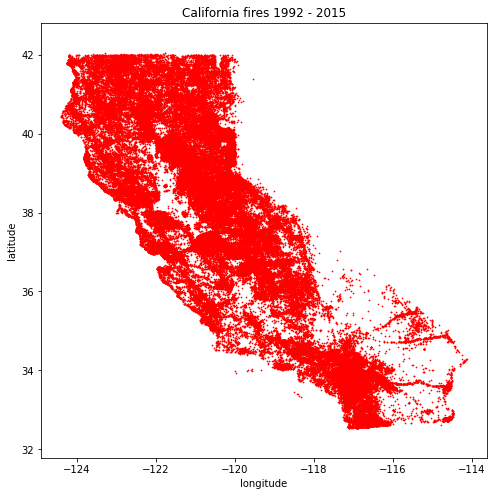

In [15]:
plt.rcParams["figure.figsize"] = (8,8)
plt.scatter(x=california_fires['lon'], y=california_fires['lat'], color='red', s=0.5)
plt.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('California fires 1992 - 2015')
plt.show()

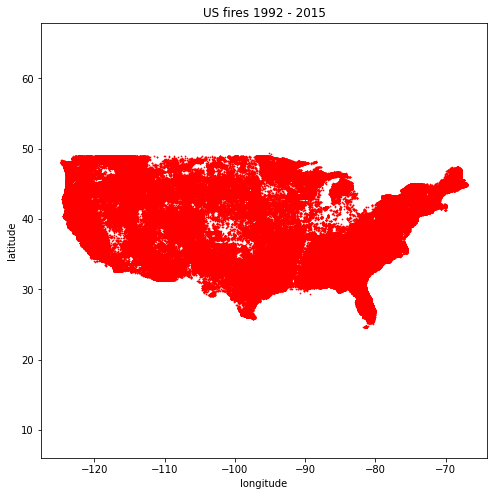

In [16]:
plt.rcParams["figure.figsize"] = (8,8)
plt.scatter(x=us_fires['lon'], y=us_fires['lat'], color='red', s=0.5)
plt.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('US fires 1992 - 2015')
plt.show()

In [17]:
california_fires.to_csv('../data/USDA_wildfire_data/california_fires.csv', index=False)
us_fires.to_parquet('/mnt/SSD/data/USDA_wildfire_data/us_fires.parquet', index=False)

Success!